In [29]:
import pandas as pd
import numpy as np 
import pickle
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB

In [173]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
from scipy import stats

In [169]:
dataframe = dataframe[(np.abs(stats.zscore(dataframe)) < 3).all(axis = 1)]

In [171]:
dataframe.shape

(662, 9)

In [153]:
X = dataframe.drop(columns='Outcome')
y = dataframe['Outcome']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Random Forest

In [155]:
model_rfr = ensemble.RandomForestClassifier()

In [156]:
n_estimators = [int(x) for x in np.linspace(100, 1500, 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2,100,5)]
max_leaf_nodes = [int(x) for x in np.linspace(2,50, 5)]


In [157]:
random_rf = {
    "n_estimators": n_estimators,
    "max_features" : max_features,
    "max_depth" : max_depth,
    "max_leaf_nodes" : max_leaf_nodes,
}

In [158]:
parameter_tuning = model_selection.RandomizedSearchCV(
    estimator=model_rfr,
    param_distributions= random_rf,
    n_iter= 15,
    scoring = 'neg_mean_squared_error',
    refit = True,
    cv=5,
    verbose = 2
)

In [159]:
parameter_tuning.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=2, n_estimators=1300; total time=   1.3s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=2, n_estimators=1300; total time=   1.3s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=2, n_estimators=1300; total time=   1.2s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=2, n_estimators=1300; total time=   1.3s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=2, n_estimators=1300; total time=   1.2s
[CV] END max_depth=51, max_features=sqrt, max_leaf_nodes=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=51, max_features=sqrt, max_leaf_nodes=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=51, max_features=sqrt, max_leaf_nodes=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=51, max_features=sqrt, max_leaf_nodes=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=51, max_features=sqrt, max_leaf_nodes=2, n

/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=26, n_estimators=700; total time=   0.7s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=26, n_estimators=700; total time=   0.7s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=26, n_estimators=700; total time=   0.7s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=26, n_estimators=700; total time=   0.7s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=26, n_estimators=700; total time=   0.7s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=26, n_estimators=400; total time=   0.4s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=26, n_estimators=400; total time=   0.4s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=26, n_estimators=400; total time=   0.4s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=26, n_estimators=400; total time=   0.4s
[CV] END max_depth=75, max_features=sqrt, max_leaf_nodes=26, n_estimators=400; total time=   0.4s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=50, n_estimators=200; total time=   0.2s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=50, n_estimators=200; total time=   0.3s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=50, n_estimators=200; total time=   0.2s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=50, n_estimators=200; total time=   0.2s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=50, n_estimators=200; total time=   0.2s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, max_leaf_nodes=2, n_estimators=800; total time=   0.8s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, max_leaf_nodes=2, n_estimators=800; total time=   0.8s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, max_leaf_nodes=2, n_estimators=800; total time=   0.8s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, max_leaf_nodes=2, n_estimators=800; total time=   0.8s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, max_leaf_nodes=2, n_estimators=800; total time=   0.8s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=1000; total time=   1.0s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=1000; total time=   1.0s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=1000; total time=   1.0s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=1000; total time=   1.0s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=1000; total time=   1.0s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=2, n_estimators=500; total time=   0.5s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=2, n_estimators=500; total time=   0.5s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=2, n_estimators=500; total time=   0.5s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=2, n_estimators=500; total time=   0.5s


/opt/anaconda3/envs/diabetes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, max_leaf_nodes=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=100, max_features=log2, max_leaf_nodes=50, n_estimators=1100; total time=   1.4s
[CV] END max_depth=100, max_features=log2, max_leaf_nodes=50, n_estimators=1100; total time=   1.4s
[CV] END max_depth=100, max_features=log2, max_leaf_nodes=50, n_estimators=1100; total time=   1.4s
[CV] END max_depth=100, max_features=log2, max_leaf_nodes=50, n_estimators=1100; total time=   1.3s
[CV] END max_depth=100, max_features=log2, max_leaf_nodes=50, n_estimators=1100; total time=   1.3s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': [2, 26, 51, 75, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [2, 14, 26, 38, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [160]:
parameter_tuning.best_params_

{'n_estimators': 1100,
 'max_leaf_nodes': 50,
 'max_features': 'log2',
 'max_depth': 100}

In [161]:
y_hat = parameter_tuning.predict(X_test)

In [162]:
y_hat 

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0])

In [163]:
from sklearn import metrics

In [164]:
metrics.classification_report(y_test, y_hat)

'              precision    recall  f1-score   support\n\n           0       0.74      0.89      0.81        85\n           1       0.74      0.49      0.59        53\n\n    accuracy                           0.74       138\n   macro avg       0.74      0.69      0.70       138\nweighted avg       0.74      0.74      0.72       138\n'

In [165]:
metrics.confusion_matrix(y_test, y_hat)

array([[76,  9],
       [27, 26]])

### Logistic Regression

In [148]:
!pip install seaborn

In [149]:
import seaborn as sns

<AxesSubplot:>

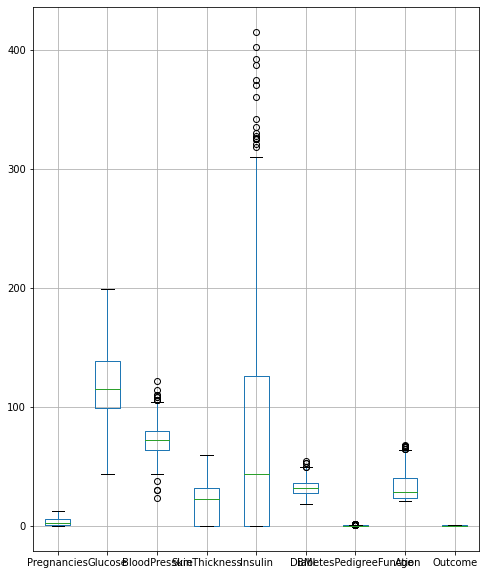

In [168]:

dataframe.boxplot(figsize=(8,10))

In [131]:
len(dataframe)

768

In [174]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


pandas==1.4.3
numpy==1.23.1
seaborn==0.11.2
